# Deep Learning Project - Traffic Signs Image Classification

In [1]:
import os, shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Overview of the training data

In [2]:
#setting the training directory (the training images can be found there, already sorted by class into folders)
# base_training_dir = "/Users/franz/Desktop/DL Project/Train/Final_Training/Images"
base_training_dir = "/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/"

#setting the directory where the selected training and validation images will be stored in
# created_dir = "/Users/franz/Desktop/DL Project/Selected"
created_dir = "/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Selected"

#storing all the folder names that belong to the respective classes
all_classes = sorted(i for i in os.listdir(base_training_dir) if i.startswith("0"))

print("There are", len(all_classes), "different classes within the training data!")

There are 43 different classes within the training data!


In [3]:
#getting the number of images within each class of the training data
amount_per_class = {}

for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory) if i.startswith("0")))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

#remove the "#" of the following line to display the number of images within each class
#amount_per_class_df

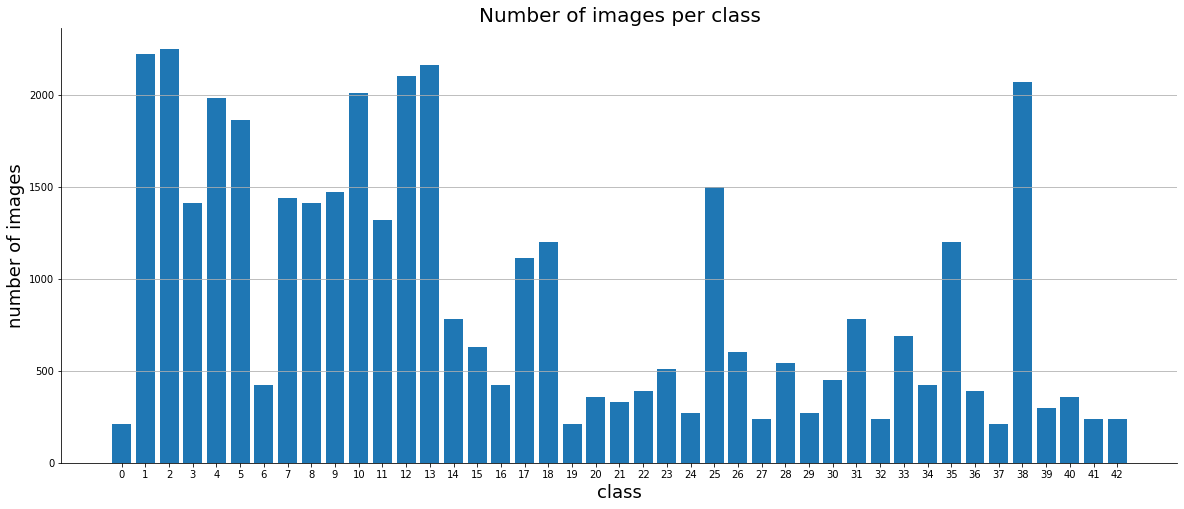

In [4]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(amount_per_class_df.index, amount_per_class_df.amount)
plt.title("Number of images per class", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(amount_per_class_df.index)
plt.grid(axis="y")
plt.show()

As it can be seen in the bar chart, the dataset is highly unbalanced. Some classes have over 2000 instances, while others only have 210.

In [5]:
#displaying the 20 classes with the fewest images
amount_per_class_df.sort_values("amount").head(20).T

class,0,37,19,32,27,41,42,24,29,39,21,40,20,36,22,6,16,34,30,23
amount,210,210,210,240,240,240,240,270,270,300,330,360,360,390,390,420,420,420,450,510


Within each class, there are several groups of images, that belong together (these are basically all images of the very same traffic sign, that just differ in that they were made as a series while approaching the actual sign). These series of images shouldn't be splitted later when the data is split into training and validation sets, so some precautions might be useful:

In [6]:
#checking the size(=amount of images) of these series and whether they are all having the same size

#running a for loop over all classes
for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    
    #get the names of all images within a class
    list_of_images = sorted(i for i in os.listdir(directory) if i.startswith("0"))

    image_series = []
    
    #store all the prefixes of the images (which correspond to the series they belong to)
    for element in list_of_images:
        image_series.append(element.split("_")[0])
    
    #count the frequency of each prefix, which equals the size of each respective series
    image_counts = pd.Series(image_series).value_counts().sort_index()

    for element in image_counts.values.tolist():
        if element != image_counts.values.tolist()[0]:
            #this line will show if there is a series that contains not the same number of images than the others
            print("There is a series whose number doesn't match the others in class", all_classes[i], ", with the prefix", image_counts.sort_values().index[0], "!\nIt only contains", element, "images.")
            

#apart from only one series, all others consist of exactly 30 images
print("All the other series of images contain exactly", image_counts.values.tolist()[0], "images!")

There is a series whose number doesn't match the others in class 00033 , with the prefix 00019 !
It only contains 29 images.
All the other series of images contain exactly 30 images!


## Split into training and validation datasets

As already mentioned, it is important for the split into training and validation sets that the individual image series stay together. As a first approach, there will be 210 images used per class, as this number corresponds to the amount of images in the "smallest" class. This will fix the problem of imbalance in the dataset. Subsequently, the data will be splitted by a 5:2 (150:60) ratio into training and validation set, in order to guarantee that the series will stay together.

In [10]:
#creating folders within the class folders for the training and validation sets
train_dir = os.path.join(created_dir, "training")
os.mkdir(train_dir)
validation_dir = os.path.join(created_dir, "validation")
os.mkdir(validation_dir)

#creating folders for each class within the training and validation folders
for i in range(len(all_classes)):
    directory_train = os.path.join(train_dir, all_classes[i])
    directory_val = os.path.join(validation_dir, all_classes[i])

    os.mkdir(directory_train)
    os.mkdir(directory_val)

FileExistsError: [Errno 17] File exists: '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Selected/training'

In [11]:
#creating a list that contains the names of the 1st, 2nd and 3rd series of images (3x30 names)
training_names = []

for i in range(5):
    name = "0000" + str(i)
    for i2 in range(30):
        if i2 < 10:
            name = name + "_0000" + str(i2) + ".ppm"
            training_names.append(name)
            name = "0000" + str(i)
        else:
            name = name + "_000" + str(i2) + ".ppm"
            training_names.append(name)
            name = "0000" + str(i)


#creating a list that contains the names of the 4th and 5th series of images (2x30 names)
val_names = []

for i in range(5,7):
    name = "0000" + str(i)
    for i2 in range(30):
        if i2 < 10:
            name = name + "_0000" + str(i2) + ".ppm"
            val_names.append(name)
            name = "0000" + str(i)
        else:
            name = name + "_000" + str(i2) + ".ppm"
            val_names.append(name)
            name = "0000" + str(i)

In [12]:
#copying the first 3 series within a class into the train folder and the 2 consecutive series into the validation folder 
for i in range(len(all_classes)):

    for name in training_names:
        src = base_training_dir + "/" + all_classes[i] + "/" + name
        dst = train_dir + "/" + all_classes[i] + "/"  + name
        shutil.copyfile(src, dst)
    
    for name in val_names:
        src = base_training_dir + "/" + all_classes[i] + "/" + name
        dst = validation_dir + "/" + all_classes[i] + "/"  + name
        shutil.copyfile(src, dst)

Now, there should be exactly 150 images within the train folder of each class and 60 images within the validation folder. Having 43 different classes, this means that there are a total of 6,450 (150x43) training images and another 2,580 (60x43) validation images. A sanity check will show if this worked correctly:

In [13]:
for i in range(len(all_classes)):
    print("Class", i, ": training set size =", len(os.listdir(train_dir + "/" + all_classes[i])), "; validation set size:", len(os.listdir(validation_dir + "/" + all_classes[i])))

Class 0 : training set size = 150 ; validation set size: 60
Class 1 : training set size = 150 ; validation set size: 60
Class 2 : training set size = 150 ; validation set size: 60
Class 3 : training set size = 150 ; validation set size: 60
Class 4 : training set size = 150 ; validation set size: 60
Class 5 : training set size = 150 ; validation set size: 60
Class 6 : training set size = 150 ; validation set size: 60
Class 7 : training set size = 150 ; validation set size: 60
Class 8 : training set size = 150 ; validation set size: 60
Class 9 : training set size = 150 ; validation set size: 60
Class 10 : training set size = 150 ; validation set size: 60
Class 11 : training set size = 150 ; validation set size: 60
Class 12 : training set size = 150 ; validation set size: 60
Class 13 : training set size = 150 ; validation set size: 60
Class 14 : training set size = 150 ; validation set size: 60
Class 15 : training set size = 150 ; validation set size: 60
Class 16 : training set size = 150

As it can be seen, it worked correctly!

## Data Preprocessing

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

Found 6450 images belonging to 43 classes.
Found 2580 images belonging to 43 classes.


## Draft of the model

#### Building the model

In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2) ))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense (43, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               42467840  
_________________________________________________________________
dense_1 (Dense)              (None, 43)                2

#### Training the model

In [17]:
from keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [18]:
import sys
from PIL import Image
sys.modules['Image'] = Image

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 43)


In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/Users/philippmetzger/anaconda3/envs/dl_pip_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 59s 584ms/step - loss: 3.6939 - acc: 0.1018 - val_loss: 3.1527 - val_acc: 0.2150
Epoch 2/30
100/100 [==============================] - 66s 659ms/step - loss: 2.2891 - acc: 0.4432 - val_loss: 2.7771 - val_acc: 0.3090
Epoch 3/30
100/100 [==============================] - 61s 607ms/step - loss: 1.5225 - acc: 0.6354 - val_loss: 2.3801 - val_acc: 0.3780
Epoch 4/30
100/100 [==============================] - 61s 603ms/step - loss: 1.0086 - acc: 0.7583 - val_loss: 2.3676 - val_acc: 0.4160
Epoch 5/30
100/100 [==============================] - 60s 601ms/step - loss: 0.8230 - acc: 0.7792 - val_loss: 2.2118 - val_acc: 0.4840
Epoch 6/30
100/100 [==============================] - 58s 585ms/step - loss: 0.5411 - acc: 0.8782 - val_loss: 2.4693 - val_acc: 0.4590
Epoch 7/30
100/100 [==============================] - 58s 577ms/step - loss: 0.4222 - acc: 0.9094 - val_loss: 2.2561 - val_acc: 0.4820
Epoch 8/30
100/100 [==============================] - 5

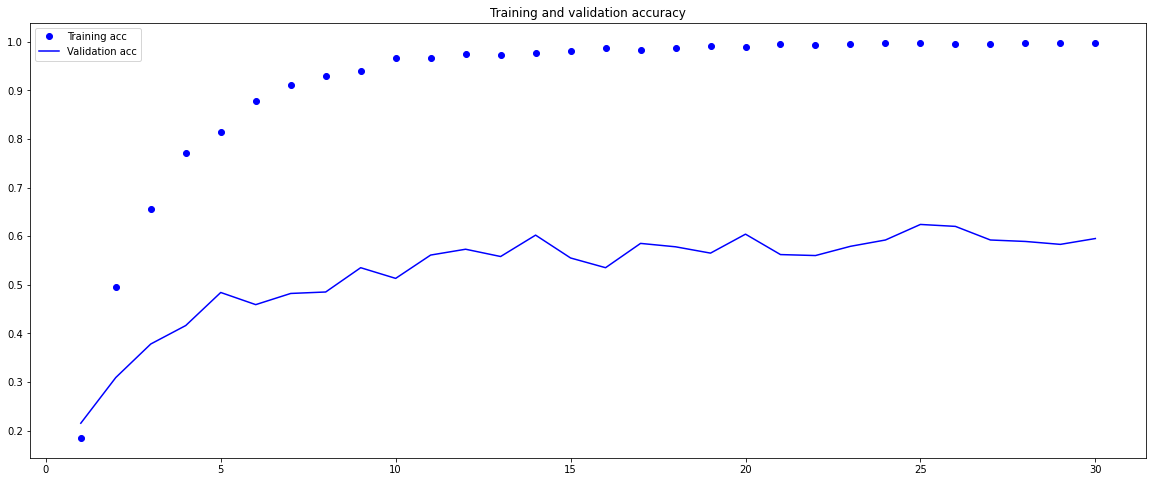

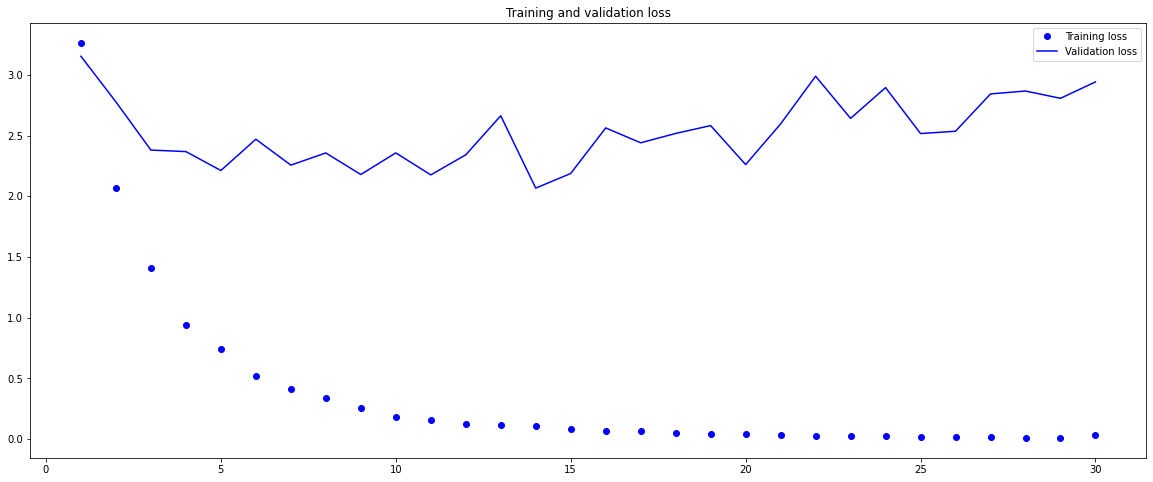

In [21]:
#Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

## Rebuidling the model with dropout

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2) ))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense (43, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
from keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
    )